In [26]:
# Load dataset
metairie = pd.read_csv('../data/metairie.csv').set_index('Unnamed: 0')
metairie.index.name = None
metairie.index = pd.to_datetime(metairie.index, format='%Y-%m')
metairie.index = pd.DatetimeIndex(metairie.index, freq='MS')
metairie = metairie.rename(columns={'70131': 'metairie'})

In [28]:
# Fit data to best model
metairie_arima_smx = sm.tsa.statespace.SARIMAX(metairie, 
                                             order=(1,1,1), 
                                             enforce_stationarity=True, 
                                             enforce_invertibility=False)
metairie_output = metairie_arima_smx.fit()

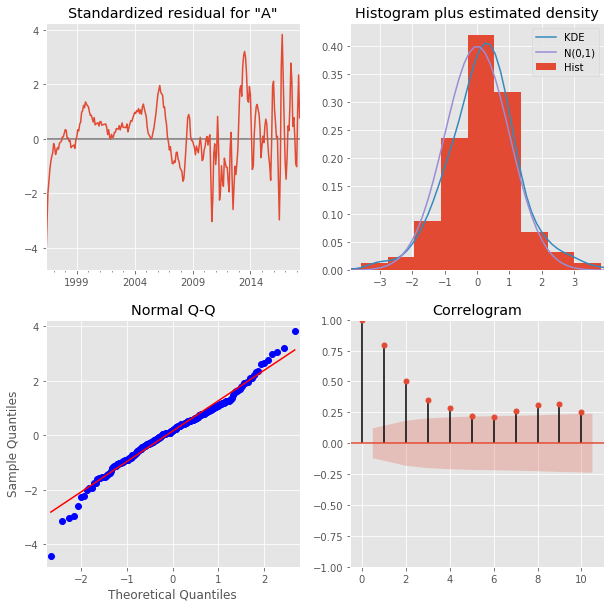

In [31]:
metairie_output.plot_diagnostics(figsize=(10, 10))
plt.show()

In [32]:
metairie.tail(3)

,Aurora
2018-02-01,165000.0
2018-03-01,166900.0
2018-04-01,167800.0


In [33]:
prediction = metairie_output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

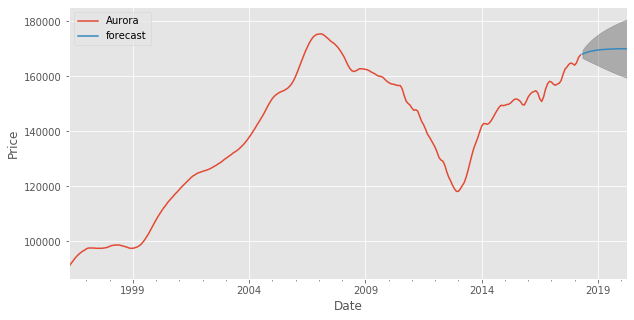

In [37]:
ax = metairie.plot(label='observed', figsize=(10,5))
prediction.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend(loc="upper left")
plt.show()

## Find numerical forecasts

In [45]:
metairie_output.forecast(24)[-1]

170106.12190599693

In [47]:
metairie_two_yr_forecast = round(metairie_output.forecast(24)[-1], 1)
metairie_two_yr_forecast

170106.1

metairie two-year ROI

In [51]:
metairie_last_price = metairie.iloc[-1]['metairie']
metairie_last_price

167800.0

In [101]:
metairie_ROI = (((metairie_two_yr_forecast - metairie_last_price) / metairie_last_price) * 100)
metairie_ROI

1.3743146603098964

In [102]:
metairie_ROI = f"{round(metairie_ROI, 2)}%"
metairie_ROI

'1.37%'

Very poor return on investment. Will look at Uptown.